# Max McKie
## HW7

In [15]:
import math
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# 1A

In [16]:
#empty lists for data points
t = []
y = []

#opening data file and populating lists 
F = open("timeseries.txt","r")
f= F.readlines()

for i in range(1,65):
    t.append(float(f[i][:5]))
    y.append(float(f[i][7:13]))

#Frequencies for x axis in padded/unpadded cases
freq1 = np.fft.fftfreq(64)
freq2 = np.fft.fftfreq(256)

x1 = freq1[:32]
x2 = freq2[:128]

The dominant contributing frequency is 0.296875 Hz


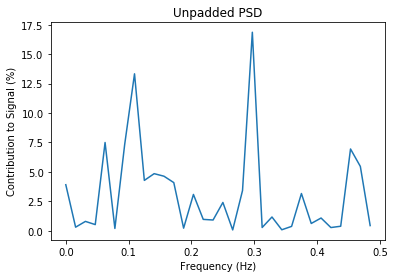

In [17]:
#shifting center to f=0
a= np.fft.fftshift(np.fft.fft(y))
aPSD = np.abs(a[32:])**2

#normalization constant
norm = np.sum(np.abs(a[32:])**2)

#plotting
plt.plot(x1,100*aPSD/norm)
plt.ylabel('Contribution to Signal (%)')
plt.xlabel('Frequency (Hz)')
plt.title('Unpadded PSD')

#finding frequency at peak
domfreq = float(freq1[[list(aPSD).index(np.max(aPSD))]])

print('The dominant contributing frequency is', domfreq,'Hz')

# 1B

In [18]:
#Creating padded data (realized later I could've done this easier)
pad = list(np.zeros(96))
pad1 = list(np.zeros(96))

for i in y:
    pad.append(i)
    
for i in pad1:
    pad.append(i)

Text(0.5, 1.0, 'Padded PSD')

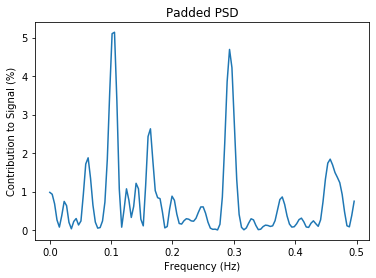

In [19]:
#same format as above but with padded data now
b= np.fft.fftshift(np.fft.fft(pad,n=256))
norm = np.sum(np.abs(b[128:])**2)


plt.plot(x2,100*np.abs(b[128:])**2/norm)
plt.ylabel('Contribution to Signal (%)')
plt.xlabel('Frequency (Hz)')
plt.title('Padded PSD')

Since the set of data points is now 4x longer, we have less uncertainty in which frequencies are present in our signal. This gives a higher resolution DFT than the unpadded case and smooths out the plot. However I cannot come up with a good reason as to why ~0.1 Hz now seems to be more dominant than 0.297 Hz.

# 1C

#### Blackman-Harris Windowing:

Text(0.5, 1.0, 'Unpadded Blackman-Harris Window PSD')

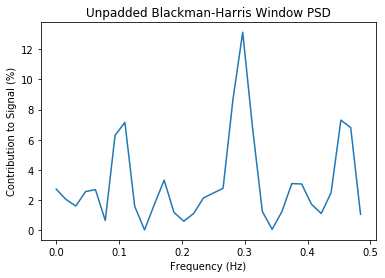

In [20]:
#creating window
BHwin = sig.blackmanharris(64)
#convolution
blackman = np.fft.fftshift(np.fft.fft(y*BHwin))
#normalization
blackNorm = np.sum(np.abs(blackman[32:])**2)
blackmanPSD1= np.abs(blackman)**2

#plotting
plt.plot(x1, 100*blackmanPSD1[32:]/blackNorm)
plt.ylabel('Contribution to Signal (%)')
plt.xlabel('Frequency (Hz)')
plt.title('Unpadded Blackman-Harris Window PSD')

Text(0.5, 1.0, 'Padded Blackman-Harris Window PSD')

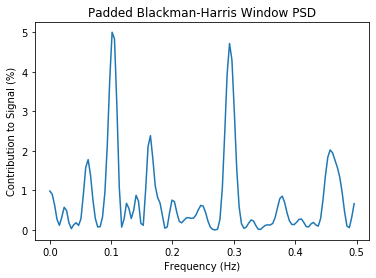

In [21]:
#Same but padded
BHwin = sig.blackmanharris(256)
blackman = np.fft.fftshift(np.fft.fft(pad*BHwin))
blackNorm = np.sum(np.abs(blackman[128:])**2)
blackmanPSD2= np.abs(blackman)**2

plt.plot(x2,100*blackmanPSD2[128:]/blackNorm)
plt.ylabel('Contribution to Signal (%)')
plt.xlabel('Frequency (Hz)')
plt.title('Padded Blackman-Harris Window PSD')

#### Boxcar Windowing:

Text(0.5, 1.0, 'Unpadded Boxcar Window PSD')

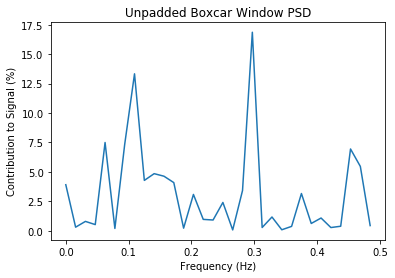

In [22]:
BCwin = sig.boxcar(64)
boxcar = np.fft.fftshift(np.fft.fft(y*BCwin))
boxNorm = np.sum(np.abs(boxcar[32:])**2)
boxcarPSD1 = np.abs(boxcar)**2

plt.plot(x1,100*boxcarPSD1[32:]/boxNorm)
plt.ylabel('Contribution to Signal (%)')
plt.xlabel('Frequency (Hz)')
plt.title('Unpadded Boxcar Window PSD')

Text(0.5, 1.0, 'Padded Boxcar Window PSD')

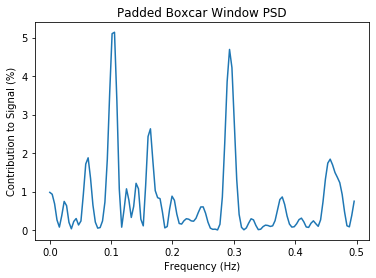

In [23]:
BCwin = sig.boxcar(256)
boxcar = np.fft.fftshift(np.fft.fft(pad*BCwin))
boxNorm = np.sum(np.abs(boxcar[128:])**2)
boxcarPSD2 = np.abs(boxcar)**2

plt.plot(x2,100*boxcarPSD2[128:]/boxNorm)
plt.ylabel('Contribution to Signal (%)')
plt.xlabel('Frequency (Hz)')
plt.title('Padded Boxcar Window PSD')

#### Triangle Windowing:

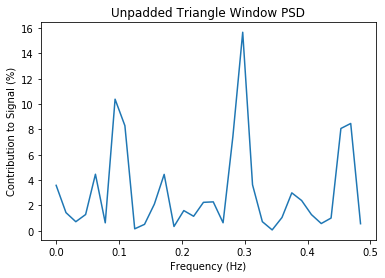

In [24]:
triWin = sig.triang(64)
triangle = np.fft.fftshift(np.fft.fft(y*triWin))
triNorm = np.sum(np.abs(triangle[32:])**2)
triPSD1 = np.abs(triangle)**2

plt.ylabel('Contribution to Signal (%)')
plt.xlabel('Frequency (Hz)')
plt.title('Unpadded Triangle Window PSD')
plt.plot(x1,100*triPSD1[32:]/triNorm)

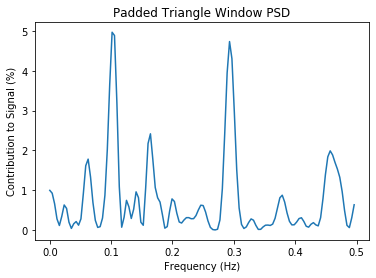

In [25]:
triWin = sig.triang(256)
triangle = np.fft.fftshift(np.fft.fft(pad*triWin))
triNorm = np.sum(np.abs(triangle[128:])**2)
triPSD2 = np.abs(triangle)**2

plt.ylabel('Contribution to Signal (%)')
plt.xlabel('Frequency (Hz)')
plt.title('Padded Triangle Window PSD')
plt.plot(x2,100*triPSD2[128:]/triNorm)

### Windowing with the padded data doesn't change almost anything, because smoothly transitioning either side of the data set to zero doesn't do anything if the sides of the data set are already zero.
### The boxcar window does nothing at all (since we just convolve with unity everywhere), but both the Blackman/Triangle windows help to make the dominant frequency peak stand out for the unpadded data.

# 2A

In [26]:
#making functions for <y^2>, Bayesian PDF, Student t PDF
def y2(N):
    return np.sum(y)/N

def Tprob(N, y2, PSD):
    return (1- 2*PSD/(N*y2))**((2-N)/2)

def Bprob(sig2, PSD):
    return np.exp(PSD/(sig2))

Text(0.5, 1.0, 'Frequency PDF for Padded Blackman-Harris (Bayesian)')

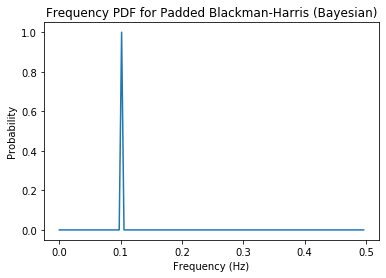

In [27]:
#gernerating Bayesian PDF with sigma^2 = 1
pdf1 = Bprob(1,blackmanPSD2)
pdfnorm = np.sum(pdf1[128:])

#plot
plt.plot(x2, pdf1[128:]/pdfnorm)
plt.ylabel('Probability')
plt.xlabel('Frequency (Hz)')
plt.title('Frequency PDF for Padded Blackman-Harris (Bayesian)')

# 2B

In [29]:
maxprob = np.max(pdf1[128:]/pdfnorm)
normpdf = pdf1[128:]/pdfnorm

maxpsd = np.max(blackmanPSD2[128:]/blackNorm)
normpsd = blackmanPSD2[128:]/blackNorm

#finding all indices for which the entry is greater than HM
PDFvals = [x for x in range(len(normpdf)) if normpdf[x] > maxprob/2]

#finding frequency bounds for FWHM
minfreq1, maxfreq1 = freq2[np.min(PDFvals)], freq2[np.max(PDFvals)]

#now same for PSD
PSDvals = [x for x in range(20,35) if normpsd[x] > maxpsd/2]
minfreq2, maxfreq2 = freq2[min(PSDvals)], freq2[max(PSDvals)]

print('FWHM of PDF =', maxfreq1-minfreq1, 'Hz (i.e. basically a delta function around',freq2[max(PDFvals)],'Hz)')
print('FWHM of PSD =',maxfreq2-minfreq2,'Hz' )

FWHM of PDF = 0.0 Hz (i.e. basically a delta function around 0.1015625 Hz)
FWHM of PSD = 0.01171875 Hz


# 2C

Text(0.5, 1.0, 'Frequency PDF for Padded Blackman-Harris (Student t)')

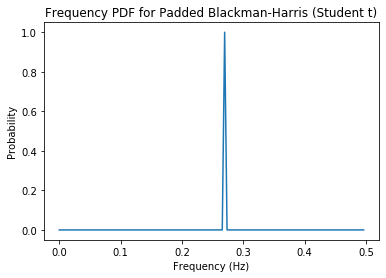

In [30]:
pdf2 = Tprob(256,y2(256), blackmanPSD2)
pdf2norm = np.sum(pdf2[128:])

plt.plot(x2,pdf2[128:]/pdf2norm)
plt.ylabel('Probability')
plt.xlabel('Frequency (Hz)')
plt.title('Frequency PDF for Padded Blackman-Harris (Student t)')

In [31]:
#same FWHM stuff as above
maxprob2 = np.max(pdf2[128:]/pdf2norm)
normpdf2 = pdf2[128:]/pdf2norm

PDF2vals = [x for x in range(len(normpdf2)) if normpdf2[x] > maxprob2/2]
minfreq3, maxfreq3 = freq2[np.min(PDF2vals)], freq2[np.max(PDF2vals)]

print('FWHM of PDF =', maxfreq3-minfreq3, 'Hz (i.e. basically a delta function around',freq2[max(PDF2vals)],'Hz)')

FWHM of PDF = 0.0 Hz (i.e. basically a delta function around 0.26953125 Hz)


# 2D

Text(0.5, 0, 'Frequency (Hz)')

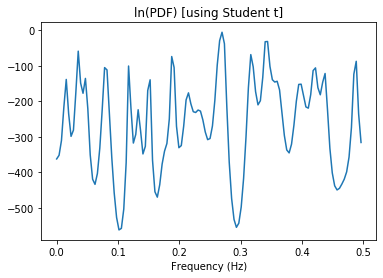

In [32]:
#plotting ln(PDF)
plt.plot(x2,np.log(pdf2[128:]))
plt.title('ln(PDF) [using Student t]')
plt.xlabel('Frequency (Hz)')

#### The most obvious feature is all of the noise that is not visible in the PDF. The natural log "unsmooths" the curve, so we can see the noise from sampling our finite aperiodic signal. It may seem like this plot doesn't give us a definitive answer about the most probable frequency making up our signal, but at even the second highest peak of about -50, this corresponds to a probability of (e^-50)=1.9e-22. 

#### Compare this with the maximally probable dominant frequency where ln(PDF) approaches zero, since e^0=1, and we can see that it shows ~0.27Hz to be almost definitely our dominant contributing frequency.

### ---------------------------------------------------------
# Extra Stuff

#### Plotting different windows and their PSDs

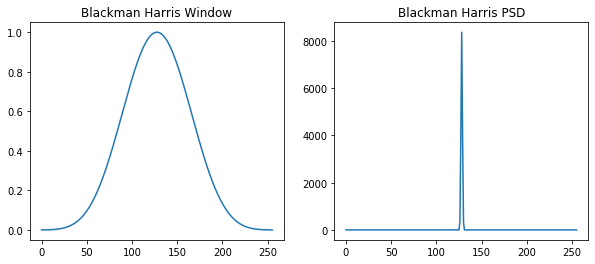

In [33]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Blackman Harris Window')
plt.plot(BHwin)
plt.subplot(122)
plt.title('Blackman Harris PSD')
plt.plot(np.abs(np.fft.fftshift(np.fft.fft(BHwin)))**2)

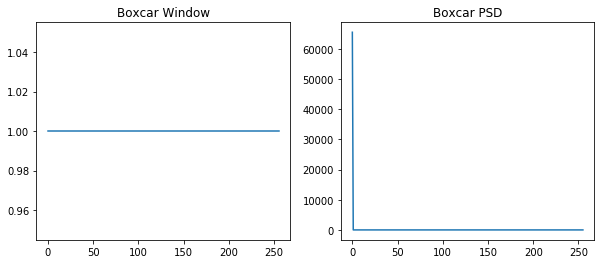

In [34]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Boxcar Window')
plt.plot(BCwin)
plt.subplot(122)
plt.title('Boxcar PSD')
plt.plot(np.abs(np.fft.fft(BCwin)**2))

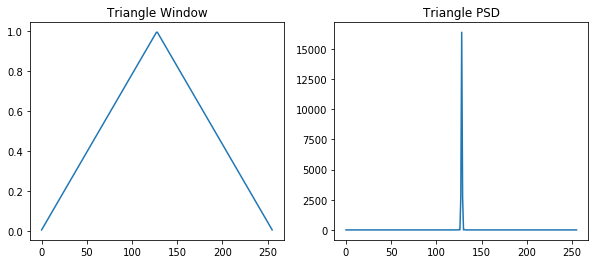

In [35]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Triangle Window')
plt.plot(triWin)
plt.subplot(122)
plt.title('Triangle PSD')
plt.plot(np.abs(np.fft.fftshift(np.fft.fft(triWin)))**2)